In [1]:
'''this code will compare the results from LOGCUBE to a run of pPXF I do myself'''

'this code will compare the results from LOGCUBE to a run of pPXF I do myself'

In [10]:
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()




In [11]:
file='../MaNGA_code/practice_logcube/manga-8459-3702-LOGCUBE-VOR10-GAU-MILESHC.fits'
file='../MaNGA_code/practice_logcube/manga-8459-3702-LOGCUBE-VOR10-GAU-MILESHC.fits'

In [12]:
logcube=pyfits.open(file)
#print(logcube[0].header)
print('DAP VERSION', logcube[0].header['VERSDAP'])

print('REFF', logcube[0].header['REFF'])
#print('Binning?', logcube[0].header['BINTYPE'])
print('SN min in fit', logcube[0].header['SCMINSN'])
print('Input Vel', logcube[0].header['SCINPVEL'])
print('Input Sigma', logcube[0].header['SCINPSIG'])
print('Number of Stellar Templates', logcube[0].header['NSCMOD'])
print('Type of Fitting', logcube[0].header['SCTYPE'])
print('PpXF? ', logcube[0].header['SCMETH'])
print('Template lib', logcube[0].header['PPXFTPLK'])
print('Bias value', logcube[0].header['PPXFBIAS'])
print('Cleaned?', logcube[0].header['PPXFCLN'])
print('Moments', logcube[0].header['PPXFMOM'])
print('Polynomial Degree', logcube[0].header['PPXFDEG'])
print('Multiplicative Polynomial Degree', logcube[0].header['PPXFMDEG'])



DAP VERSION 2.0.2
REFF 4.0408902
SN min in fit 1.0
Input Vel 21648.163
Input Sigma 100.0
Number of Stellar Templates 597
Type of Fitting stellar_kinematics
PpXF?  ppxf
Template lib MILESHC
Bias value None
Cleaned? False
Moments 2
Polynomial Degree 8
Multiplicative Polynomial Degree -1


In [13]:
print(shape(logcube[6].data))

(4563, 42, 42)


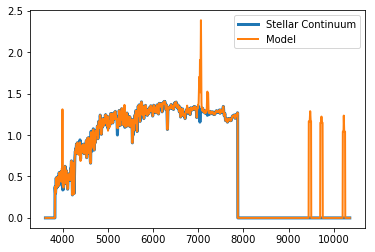

In [14]:
stellar_cont=logcube[6].data-logcube[7].data-logcube[8].data
plt.plot(logcube[4].data,stellar_cont[:,20,20],lw=3, label='Stellar Continuum')
plt.plot(logcube[4].data,logcube[6].data[:,20,20],lw=2, label='Model')
plt.legend()
#plt.xlim([5400,5600])
plt.show()

In [15]:
xs=logcube[4].data
ys=logcube[1].data[:,20,20]
noise=logcube[2].data[:,20,20]
mask=logcube[3].data[:,20,20]

print(shape(mask))


(4563,)


In [16]:

import sys 

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()

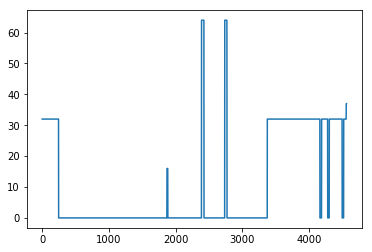

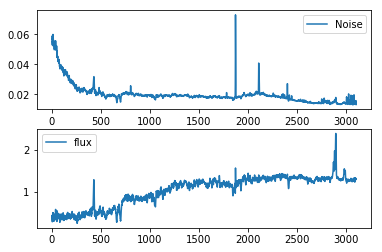

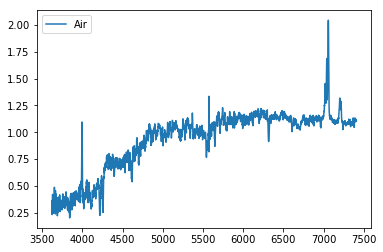

frac 1.00023028502 3704.92187579 3704.06888421
<class 'numpy.ndarray'>


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


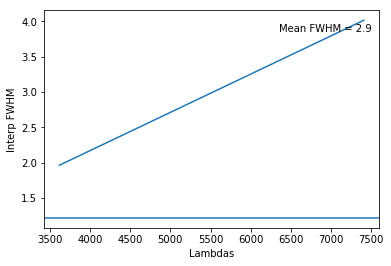

velscale 69.0297644781


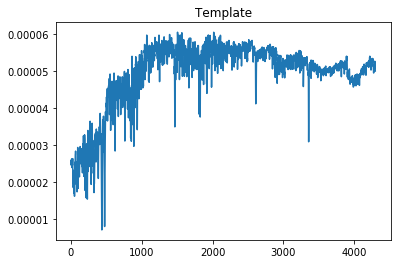

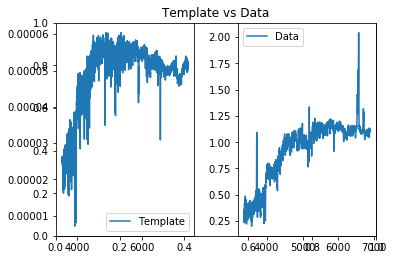

wavelength lims [3900, 4100]


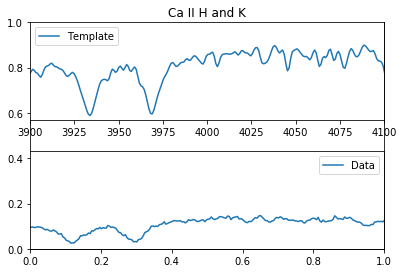

wavelength lims [4250, 4350]


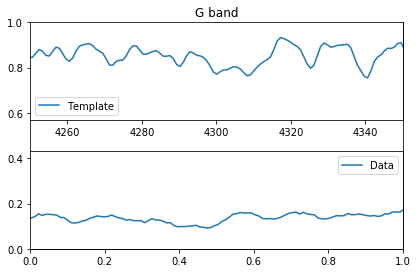

wavelength lims [5100, 5300]


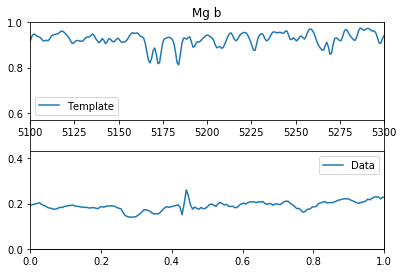

wavelength lims [5800, 5950]


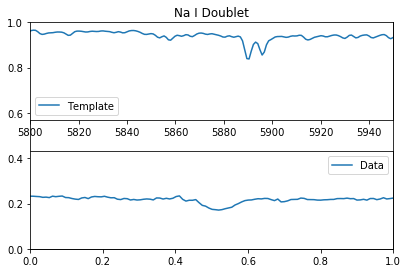

len gal 3109 len temp 3208


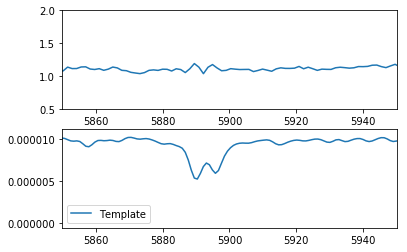

must improve chi2 by:  72.5534285889
input vel 21648.163


/usr/local/lib/python2.7/site-packages/ppxf/ppxf.py:1299: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  a = np.zeros((ncols, nrows))  # This array is used for the system solution
/usr/local/lib/python2.7/site-packages/ppxf/ppxf.py:868: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  for j in range(1, reg_dim - 1):


Best Fit:       Vel     sigma
 comp. 0:     20918       178
chi2/DOF: 2.084
Function evaluations: 23 Status: 1
Nonzero Templates:  50  /  156
Formal errors:
     dV    dsigma   dh3      dh4
     3.4     3.8
Elapsed time in PPXF: 9.52 s


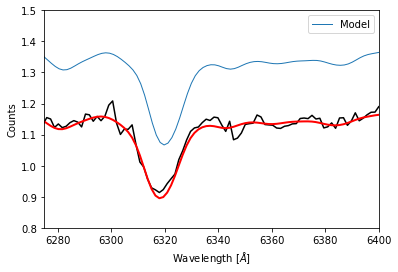

In [55]:
y=ppxf_miles(xs,ys,noise,mask,1,'yes',0,'yes',8,-1,100,0,0, logcube[0].header['SCINPVEL'],  logcube[0].header['SCINPSIG'], 2)

wdisp 2891 lam_gal 2891
velscale 69.1451441267
header miles hc SIMPLE  =                    T / Written by IDL:  Tue Feb 10 09:53:13 2015      BITPIX  =                  -64 / Number of bits per data pixel                  NAXIS   =                    1 / Number of data axes                            NAXIS1  =                 4300 /                                                TPLLIB  = 'MILES   '           /Template library                                FWHM    =              2.50000 /FWHM of resolution element (angstroms)          CRPIX1  =                    1 /                                                CRVAL1  =        3540.50000000 /                                                CDELT1  =       0.900000000000 /                                                END                                                                                                                                                                                                                      

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


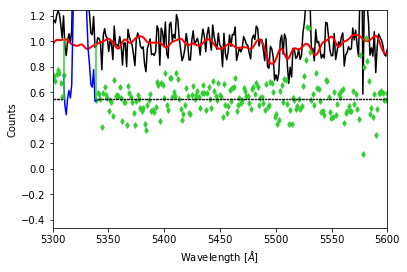

In [44]:
y=ppxf_int_J1354(10,'no',0,'yes',8,-1,0,0,0, c*np.log(1 + 0.06335),  logcube[0].header['SCINPSIG'], 2)

In [35]:
c=2.99792458e5
redshift=np.exp( 18523     /c)-1
print('redshift', redshift)

redshift 0.0637347634308


In [54]:
def ppxf_miles(t,flux,noise,mask,vr, plot, bs, conv, dg, mdg, regularization, redo_noise, last_chi,input_vel, input_sig, mom ):

    file_dir = '../ppxf'  # path of this procedure
    c=2.99792458e5
    input_z=np.exp( input_vel     /c)-1

    if plot=='yes':
        plt.plot(mask)
        plt.show()
        
        
        
    '''step 1: Mask with the Manga Mask'''
    #flux = ma.masked_array(flux, mask=mask)
    #t = ma.masked_array(t, mask=mask)
    #noise = ma.masked_array(noise, mask=mask)
    #print('wavelengths 1', t)
    #plt.plot(t, flux)
    #plt.show()
    '''step 2: Mask with the other mask to restrict wavelengths'''
    mask_2 =  (t < 7409) & (t > 3540) #&
    
    flux=flux[mask_2]
    t=t[mask_2]
    noise=noise[mask_2]
   

    
    
    var = 1/np.sqrt(noise)
    var_scaled=var#/np.median(flux)
    
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(2,1,1)
        ax1.plot(var, label='Noise')
        plt.legend()
        ax2=fig.add_subplot(2,1,2)
        ax2.plot(flux, label='flux')
        plt.legend()
        plt.show()
    galaxy = flux   
    if regularization!=0:
        #TEMPLATES/=np.median(TEMPLATES))
        galaxy/=np.median(galaxy)
    #apparently we don't need the normalization
    #/np.median(flux)   # Normalize spectrum to avoid numerical issues

    
    loglam_gal = np.log(t)
    lam_gal = t
    
    lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)

    if plot=='yes':
        plt.plot(lam_gal, galaxy, label='Air')
        
        plt.legend()
        plt.show()
    
    
    if redo_noise == 0:
        noise = var_scaled
    else:
        noise = var_scaled*np.sqrt(last_chi)

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[100]/lam_gal[99]    # Constant lambda fraction per pixel
    
    print('frac', frac, lam_gal[100], lam_gal[99])
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    #wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    #print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    print(type(lam_gal))
    xs=np.linspace(0,len(lam_gal)-1,len(lam_gal))
    
    x_1=np.linspace(0,len(lam_gal)-2,len(lam_gal)-1)
    fwhm_gal=[2.355*(lam_gal[x+1]-lam_gal[x]) for x in x_1]
    fwhm_gal.append(fwhm_gal[len(x_1)-1])
    fwhm_gal=np.array(fwhm_gal)
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.axhline(y=(lam_gal[-1]-lam_gal[0])/len(lam_gal))
        plt.annotate('Mean FWHM = '+str(round(2.355*((lam_gal[-1]-lam_gal[0])/len(lam_gal)),1)),xy=(0.7,0.9),xycoords='axes fraction')
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
    
    '''fwhm_gal = [(2.355*(lam_gal[x]))/2000 for x in xs] # Resolution FWHM of every pixel, in Angstroms
    
    #resolution is 2000
    #
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()'''
        
        
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
 
    
    file_dir = glob.glob('../ppxf/miles_models/Mun*.fits')
    
    #file_dir = glob.glob('../MaNGA_code/practice_logcube/DAP/data/spectral_templates/miles_cluster/*.fits')

    

    hdu = fits.open(file_dir[10])
    ssp = hdu[0].data
    h2 = hdu[0].header
    
   
    
    if plot=='yes':
        plt.plot(ssp)
        plt.title('Template')
        plt.show()
    
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew_1 = util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)[0]
    
    
    lam_gal_plot = lam_gal/(1+input_z)
    
    lines=['Ca II H and K', 'G band','Mg b', 'Na I Doublet']
    wavelength_limits=[[3900,4100],[4250,4350],[5100,5300],[5800,5950]]
    
    if plot=='yes':
        fig=plt.figure()
        plt.title('Template vs Data')
        ax1=fig.add_subplot(1,2,1)
        ax1.plot(lam_temp,ssp, label='Template')
        
        plt.legend()

        ax2=fig.add_subplot(1,2,2)
        ax2.plot(lam_gal_plot, galaxy, label='Data')
      

        plt.legend()
        plt.tight_layout()
        plt.show()
    
    if plot=='yes':
        for i in range(len(lines)):
            plt.clf()
            fig=plt.figure()
            plt.title(lines[i])
            ax1=fig.add_subplot(2,1,1)
            ax1.plot(lam_temp,ssp, label='Template')
            print('wavelength lims', wavelength_limits[i])
            plt.xlim(wavelength_limits[i])
            ax1.set_yticks([])
            ax1.set_ylabel([])
            ax1.yaxis.set_visible(False)
            
            plt.legend()

            ax2=fig.add_subplot(2,1,2)
            ax2.plot(lam_gal_plot, galaxy, label='Data')
            plt.xlim(wavelength_limits[i])
        
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            ax2.set_yticks([])
            ax2.set_ylabel([])
            
            ax2.set_xticks([])
            ax2.set_xlabel([])

            plt.legend()
            plt.tight_layout()
            plt.show()
    
    print('len gal',len(lam_gal), 'len temp', len(sspNew_1))
    templates = np.empty((sspNew_1.size, len(file_dir)))
    
    fwhm_tem = 2.5

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(file_dir):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        if conv=='yes':
            ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, galaxy, label='Gal')
        ax1.set_xlim([5850,5950])
        ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, input_z)
    print('must improve chi2 by: ', np.sqrt(2*len(goodpixels)))

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + input_z)   # Initial estimate of the galaxy velocity in km/s
    print('input vel', vel)
    start = [vel, input_sig]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()
    if regularization !=0:
        templates/=np.median(templates)

    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, bias=bs, plot=True, moments=mom,
              degree=dg,mdegree=mdg, vsyst=dv, velscale_ratio=vr, regul=regularization,
              lam=lam_gal, clean=False)#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))
    
    plt.plot(logcube[4].data,logcube[6].data[:,20,20],lw=1, label='Model')

    plt.legend()
    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    plt.xlim([6275,6400])
    plt.ylim([0.8,1.5])
    plt.show()
    return lam_gal, galaxy, pp.error[0], pp.chi2




In [125]:
'''checking parameters'''

file='../MaNGA_code/practice_logcube/manga-8459-3702-MAPS-VOR10-GAU-MILESHC.fits'
maps=pyfits.open(file)
print(maps['STELLAR_VEL'].data[20,20])
print(maps['STELLAR_SIGMA'].data[20,20])

NSA_redshift=0.0722105#0.0723216

#0.0722105 ± 0.000011744

#vel balmer 21013.369140625
#vel forbidden 20978.62109375
#EBV_star 0.08089999854564667
#vel stars 20968.185546875 4.110400199890137
#sig stars 155.95849609375 4.435699939727783

c=2.99792458e5
NSA_vel=c*np.log(1 + NSA_redshift)
#V*_corrected = V*_MPL-5 - 25.89

print('NSA_vel',NSA_vel,'NSA plus', (maps['STELLAR_VEL'].data[20,20]-25.89)*(1+NSA_redshift)+(NSA_vel-25.89) )

code_vel=20919
code_sig=106

print('my velocity', code_vel)
print('my sigma', code_sig)


#20813 from sdss

40.2941486656
171.839357498
NSA_vel 20902.2512663 NSA plus 20891.8055457
my velocity 20919
my sigma 106


input vel 21648.163
problem 0.1
wdisp 2899 lam_gal 2899
velscale 68.96649316
fwhm_tem 2.119500000000214
must improve chi2 by:  72.5534285889


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python2.7/site-packages/ppxf/ppxf.py:1299: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  a = np.zeros((ncols, nrows))  # This array is used for the system solution
/usr/local/lib/python2.7/site-packages/ppxf/ppxf.py:868: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  for j in range(1, reg_dim - 1):


Best Fit:       Vel     sigma
 comp. 0:     20813       172
chi2/DOF: 0.1726
Function evaluations: 38 Status: 1
Reddening E(B-V): 0
Nonzero Templates:  34  /  49
Formal errors:
     dV    dsigma   dh3      dh4
     5.4     6.1
Elapsed time in PPXF: 4.62 s
Best-fitting redshift z: 0.149504828644


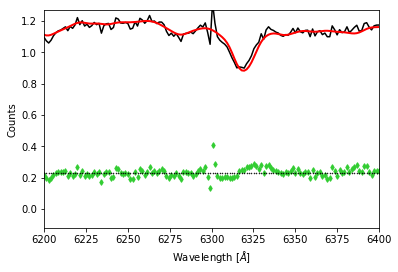

In [165]:
y=ppxf_miles_comparison('no',1,'no',0,'yes',8,-1,100,0,0, logcube[0].header['SCINPVEL'],  logcube[0].header['SCINPSIG'], 2,0.08)

In [355]:


'''run ppxf on a random galaxy that is in MaNGA, sdss, and OSSY'''
'''Luckily this ends up being the one from our code'''

'''c=2.99792458e5#c*np.log(1 + redshift_J1354),
y=ppxf_miles('no',1,'no',0,'yes',8,-1,100,0,0, 18493,  127, 2, 0.1)'''
def ppxf_tremonti_log(file,lam_min, lam_max,pre_z,vr, plot, bs, conv, dg,mdg, regularization, redo_noise, last_chi, input_vel, input_sig, mom, reddening):

    file_dir = '../ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    #0.0723216
    
    hdu = fits.open(file)
   
    t = hdu['COADD'].data

    c=2.99792458e5
    
    print('input vel', input_vel)
    input_z = np.exp( input_vel     /c)-1
    if pre_z=='yes':
        z=0
    else:
        z=input_z
    #z = 0.0633581002031   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(lam_min)) & (t['loglam'] < np.log10(lam_max))
    
    #mask_2 =  (t < 7409) & (t > 3540)
    flux = t['flux']#[mask]
    var = np.sqrt(1/abs(t['ivar']))
    print('problem', var[1])
    #var = np.full_like(flux, 0.5) 
    
    
    
    var_scaled=var
    
    
    galaxy = flux   
    if regularization!=0:
        #TEMPLATES/=np.median(TEMPLATES))
        galaxy/=np.median(galaxy)
        var_scaled/=np.median(galaxy)
        # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam']#[mask]
    lam_gal = 10**loglam_gal
    lam_gal_vac = lam_gal

   
    #lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)
    #lam_gal = util.vac_to_air(lam_gal)
    
   
    if plot=='yes':
        plt.plot(lam_gal, galaxy, label='Air')
        plt.plot(lam_gal_vac, galaxy, label='Vacuum')
        plt.legend()
        plt.show()
    
    
    if redo_noise == 0:
        noise = var_scaled
    else:
        noise = var_scaled*np.sqrt(last_chi)
    
    if plot=='yes':
        plt.plot(lam_gal,noise, label='Sigma')
        plt.legend()
        plt.show()  
    noise=np.array(noise)
    for i in range(len(noise)):
        if noise[i]<0:
            print('problem var neg', noise[i])
            noise[i]=1e6
        if np.isinf(noise[i]):
            print('problem isinifinite', noise[i])
            noise[i]=1e6
    
        
   
    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp']#[mask]        # Intrinsic dispersion of every pixel, in pixels units
    print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    if pre_z=='yes':
        lam_gal = lam_gal/(1+input_z)  # Compute approximate restframe wavelength
        fwhm_gal = fwhm_gal/(1+input_z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
 
 
    file_dir = glob.glob('../MaNGA_code/practice_logcube/DAP/data/spectral_templates/miles_cluster/*.fits')

    #file_dir = glob.glob('../ppxf/miles_models/Mun*.fits')
    #file_dir = glob.glob('../ppxf/indo_us/IRAF/*.fits')

    
    file_dir = glob.glob('../gandalf_release_v1.5/SDSS_example/BC03_Tremonti04_templates/*.fits')
    hdu = fits.open(file_dir[0])
    
    ssp = hdu[0].data
    h2 = hdu[0].header
    
    
    #I think that the tremonti spectra are actually already in log space
    lam_temp_log = (h2['CRVAL1']) + (h2['CD1_1'])*np.arange(h2['NAXIS1'])
    
    print('temp crval1', h2['CRVAL1'])
    print('temp cd1_1', h2['CD1_1'])
    
    print('10** temp crval1', 10**h2['CRVAL1'])
    print('10** temp cd1_1', 10**h2['CD1_1'])
    
    print('exp temp crval1', np.exp(h2['CRVAL1']))
    print('exp temp cd1_1', np.exp(h2['CD1_1']))
    lam_temp = 10**(lam_temp_log)
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    
    print('min', np.min(lam_temp), 'max', np.max(lam_temp))
    sspNew_1 = ssp#util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)[0]
    templates = np.empty((sspNew_1.size, len(file_dir)))
    
    fwhm_tem = 10**(h2['CD1_1'])*2.355
    print('fwhm_tem', fwhm_tem)

    
    lam_gal_plot = lam_gal/(1+input_z)
    
    lines=['Ca II H and K', 'G band','Mg b', 'Na I Doublet']
    wavelength_limits=[[3900,4100],[4230,4270],[5100,5300],[5800,5950]]
    
    if plot=='yes':
        plt.plot(lam_temp,ssp, label='Template')
        
        plt.legend()
        plt.show()
    
    '''if plot=='yes':
        for i in range(len(lines)):
            plt.clf()
            fig=plt.figure()
            plt.title(lines[i])
            ax1=fig.add_subplot(2,1,1)
            ax1.plot(lam_temp,ssp, label='Template')
            print('wavelength lims', wavelength_limits[i])
            plt.xlim(wavelength_limits[i])
            ax1.set_yticks([])
            ax1.set_ylabel([])
            ax1.yaxis.set_visible(False)
            
            plt.legend()

            ax2=fig.add_subplot(2,1,2)
            ax2.plot(lam_gal_plot, galaxy, label='Data')
            plt.xlim(wavelength_limits[i])
        
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            ax2.set_yticks([])
            ax2.set_ylabel([])
            
            ax2.set_xticks([])
            ax2.set_xlabel([])

            plt.legend()
            plt.tight_layout()
            plt.show()'''
    
    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/10**(h2['CD1_1']) # Sigma difference in pixels
    
    print('sigma kernel', sigma)
    plt.clf()
    for j, fname in enumerate(file_dir):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        h2 = hdu[0].header
        lam_temp_log = (h2['CRVAL1']) + (h2['CD1_1'])*np.arange(h2['NAXIS1'])
    
        lam_temp = 10**(lam_temp_log)
        lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    
        if conv=='yes':
            ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew=ssp#,logLam1, velscale_new = util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)
        plt.plot(lam_temp_log,sspNew/np.median(sspNew))
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    plt.show()
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, galaxy, label='Gal')
        ax1.set_xlim([5850,5950])
        ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)
    print('must improve chi2 by: ', np.sqrt(2*len(goodpixels)))

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    
    vel_start=c*np.log(1 + z)
    
    start = [vel_start, input_sig]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    
    t = clock()
    if regularization !=0:
        templates/=np.median(templates)
        
        
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(2,1,1)
        ax1.plot(noise, label='Noise')
        plt.legend()
        ax2=fig.add_subplot(2,1,2)
        ax2.plot(galaxy, label='flux')
        plt.legend()
        plt.show()

    print('velscale', velscale)
    
    
    pp = ppxf(templates, galaxy, noise, velscale, start,
          goodpixels=goodpixels, bias=bs, plot=True, moments=mom,
          degree=dg,mdegree=mdg, vsyst=dv, regul=regularization,
          clean=False)#was degree=12

    
    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    print('Best-fitting redshift z:', (input_z + 1)*(1 + pp.sol[0]/c) - 1)

#------------------------------------------------------------------------------
    #plt.xlim([1800,2200])
    #plt.xlim([5800,5950])#This was for Na lines
    #plt.xlim([3800,4100])
    #plt.xlim([6030,6080])
    #plt.ylim([0.8,1.2])
    #plt.xlim([2180,2220])
    plt.ylim([0,5])
    plt.show()
   
    return lam_gal, galaxy, pp.error[0], pp.chi2




input vel 18416
problem 3.68277
wdisp 3833 lam_gal 3833
velscale 69.1451441267
temp crval1 3.5314788818359375
temp cd1_1 0.0001
10** temp crval1 3399.9997243771677
10** temp cd1_1 1.0002302850208247
exp temp crval1 34.1744702652
exp temp cd1_1 1.000100005
min 3399.99972438 max 9197.69241143
fwhm_tem 2.3555423212240423
sigma kernel [ 0.          0.          0.         ...,  1.29821536  1.29945567
  1.30069753]


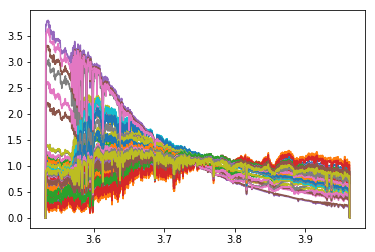

must improve chi2 by:  84.7112743382
velscale 69.1451441267


/usr/local/lib/python2.7/site-packages/ppxf/ppxf.py:1299: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  a = np.zeros((ncols, nrows))  # This array is used for the system solution
/usr/local/lib/python2.7/site-packages/ppxf/ppxf.py:868: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  for j in range(1, reg_dim - 1):


Best Fit:       Vel     sigma
 comp. 0:     18399        75
chi2/DOF: 0.02466
Function evaluations: 9 Status: 1
Nonzero Templates:  29  /  39
Formal errors:
     dV    dsigma   dh3      dh4
      33      53
Elapsed time in PPXF: 1.50 s
Best-fitting redshift z: 0.128615135671


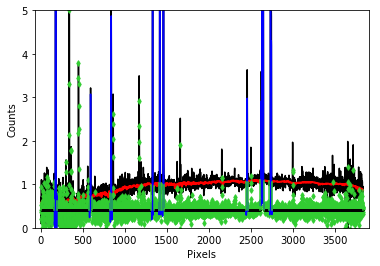

In [356]:
#y=ppxf_tremonti_log('../spec-0941-52709-0466.fits',3490,9167,'no',1,'no',0,'yes',8,-1,100,0,0, 20963,  100, 2, 0.08)

y=ppxf_tremonti_log('../spec-1777-53857-0076.fits',3490,9167,'no',1,'no',0,'yes',8,-1,100,0,0, 18416,  100, 2, 0.08)


In [ ]:
y=ppxf_tremonti_log(3490,9167,'no',1,'no',0,'yes',8,-1,100,0,0, 20963,  100, 2, 0.08)

In [136]:
file='../drpall_test.fits'
drpall=pyfits.open(file)
#print(drpall[1].header)
#print(drpall[1].data[50][69])
#print(drpall[1].data[51]['NSA_Z'])

print(shape(drpall[1].data))
for i in range(len(drpall[1].data)):
    if str(drpall[1].data[i][0])=='8459' and drpall[1].data[i][1]=='3702':
        print('everything', drpall[1].data[i])
        print('NSA redshift',drpall[1].data[i]['NSA_REDSHIFT'])
        print('NSA redshift',drpall[1].data[i]['IAUNAME'])

(3282,)
everything (8459, '3702', '8459-3702', '1-166919', 'v1_5_0', 'v1_5_0', 'v1_2_0', 'v5_5_23', 'v2_0', 'APOGEE-2&MaNGA', 'MaNGA dither', 146.709100143, 43.423842959600002, 176.80346978, 49.573335614500003, 146.70910000000001, 43.423842999999998, 0.0152958, 12, 10801.0, 1, 38.508200000000002, 68.248400000000004, 'ma128', 27, '6', 8957, 148.60705999999999, 43.236012000000002, 1.01762, 1.02241, 1.0478400000000001, 1.46065, 1.80497, 2.1418699999999999, 0.86625200000000002, 0.883799, 0.89207499999999995, 57093, 57096, 57096, 2.90401, 2.8277100000000002, 2.8156400000000001, 2.8031299999999999, 4288, 0, 0, 1, 'plateTargets-1.par', 6958, 'J094650.18+432525.8', 37, 37, 0, 143, 2964, 'v1_0_0', 176496, 0.072210499999999997, 0.0723216, array([-17.3546, -18.3471, -19.7321, -21.1649, -21.9362, -22.3022, -22.5646]), array([-17.8735, -18.5189, -19.8366, -21.1537, -21.8119, -22.1061, -22.3549]), array([   13.8206,   140.221 ,   296.063 ,  2437.26  ,  1894.6   ,
        2444.37  ,   999.217 ]), 731

In [151]:
'''All of the MaNGA redshifts come from the NSA catalog:'''

file='../nsa_v0_1_2.fits'
nsa_cat=pyfits.open(file)

#print(nsa_cat[1].header)
print(nsa_cat[1].data[1]['Z'])#146.70908349497

for i in range(len(nsa_cat[1].data)):
    #if nsa_cat[1].data[i]['IAUNAME']=='J135429.05+132757.2':
    #if nsa_cat[1].data[i]['PLATE']==941 and nsa_cat[1].data[i]['FIBERID']==466:
    #    print(nsa_cat[1].data[i])
    #if nsa_cat[1].data[i]['MJD']==52709:
    #    print(nsa_cat[1].data[i])
    #if nsa_cat[1].data[i]['PLUG_RA']=='146.70908':
    #    print(nsa_cat[1].data[i])
    if nsa_cat[1].data[i]['Z'] > 0.07:
        print(nsa_cat[1].data[i])

0.0526543


In [304]:


'''run ppxf on a random galaxy that is in MaNGA, sdss, and OSSY'''
'''Luckily this ends up being the one from our code'''

'''c=2.99792458e5#c*np.log(1 + redshift_J1354),
y=ppxf_miles('no',1,'no',0,'yes',8,-1,100,0,0, 18493,  127, 2, 0.1)'''
def ppxf_tremonti(lam_min, lam_max,pre_z,vr, plot, bs, conv, dg,mdg, regularization, redo_noise, last_chi, input_vel, input_sig, mom):

    file_dir = '../ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    #0.0723216
    file = '../spec-0941-52709-0466.fits'
    hdu = fits.open(file)
   
    t = hdu['COADD'].data

    c=2.99792458e5
    
    print('input vel', input_vel)
    input_z = np.exp( input_vel     /c)-1
    if pre_z=='yes':
        z=0
    else:
        z=input_z
    #z = 0.0633581002031   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(lam_min)) & (t['loglam'] < np.log10(lam_max))
    
    #mask_2 =  (t < 7409) & (t > 3540)
    flux = t['flux']#[mask]
    var = np.sqrt(1/abs(t['ivar']))
    print('problem', var[1])
    #var = np.full_like(flux, 0.5) 
    
    
    
    var_scaled=var
    
    
    galaxy = flux   
    if regularization!=0:
        #TEMPLATES/=np.median(TEMPLATES))
        galaxy/=np.median(galaxy)
        var_scaled/=np.median(galaxy)
        # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam']#[mask]
    lam_gal = 10**loglam_gal
    lam_gal_vac = lam_gal

   
    lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)
    #lam_gal = util.vac_to_air(lam_gal)
    
   
    if plot=='yes':
        plt.plot(lam_gal, galaxy, label='Air')
        plt.plot(lam_gal_vac, galaxy, label='Vacuum')
        plt.legend()
        plt.show()
    
    
    if redo_noise == 0:
        noise = var_scaled
    else:
        noise = var_scaled*np.sqrt(last_chi)
    
    if plot=='yes':
        plt.plot(lam_gal,noise, label='Sigma')
        plt.legend()
        plt.show()  
    noise=np.array(noise)
    for i in range(len(noise)):
        if noise[i]<0:
            print('problem var neg', noise[i])
            noise[i]=1e6
        if np.isinf(noise[i]):
            print('problem isinifinite', noise[i])
            noise[i]=1e6
    
        
   
    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp']#[mask]        # Intrinsic dispersion of every pixel, in pixels units
    print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    if pre_z=='yes':
        lam_gal = lam_gal/(1+input_z)  # Compute approximate restframe wavelength
        fwhm_gal = fwhm_gal/(1+input_z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
 
 
    file_dir = glob.glob('../MaNGA_code/practice_logcube/DAP/data/spectral_templates/miles_cluster/*.fits')

    #file_dir = glob.glob('../ppxf/miles_models/Mun*.fits')
    #file_dir = glob.glob('../ppxf/indo_us/IRAF/*.fits')

    
    file_dir = glob.glob('../gandalf_release_v1.5/SDSS_example/BC03_Tremonti04_templates/*.fits')
    hdu = fits.open(file_dir[0])
    
    ssp = hdu[0].data
    h2 = hdu[0].header
    
    
    #I think that the tremonti spectra are actually already in log space
    lam_temp_log = (h2['CRVAL1']) + (h2['CD1_1'])*np.arange(h2['NAXIS1'])
    
    print('temp crval1', h2['CRVAL1'])
    print('temp cd1_1', h2['CD1_1'])
    
    print('10** temp crval1', 10**h2['CRVAL1'])
    print('10** temp cd1_1', 10**h2['CD1_1'])
    
    print('exp temp crval1', np.exp(h2['CRVAL1']))
    print('exp temp cd1_1', np.exp(h2['CD1_1']))
    lam_temp = 10**(lam_temp_log)
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    
    print('min', np.min(lam_temp), 'max', np.max(lam_temp))
    sspNew_1 = ssp#util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)[0]
    templates = np.empty((sspNew_1.size, len(file_dir)))
    
    fwhm_tem = 10**(h2['CD1_1'])*2.355
    print('fwhm_tem', fwhm_tem)

    
    lam_gal_plot = lam_gal/(1+input_z)
    
    lines=['Ca II H and K', 'G band','Mg b', 'Na I Doublet']
    wavelength_limits=[[3900,4100],[4230,4270],[5100,5300],[5800,5950]]
    
    if plot=='yes':
        plt.plot(lam_temp,ssp, label='Template')
        
        plt.legend()
        plt.show()
    
    '''if plot=='yes':
        for i in range(len(lines)):
            plt.clf()
            fig=plt.figure()
            plt.title(lines[i])
            ax1=fig.add_subplot(2,1,1)
            ax1.plot(lam_temp,ssp, label='Template')
            print('wavelength lims', wavelength_limits[i])
            plt.xlim(wavelength_limits[i])
            ax1.set_yticks([])
            ax1.set_ylabel([])
            ax1.yaxis.set_visible(False)
            
            plt.legend()

            ax2=fig.add_subplot(2,1,2)
            ax2.plot(lam_gal_plot, galaxy, label='Data')
            plt.xlim(wavelength_limits[i])
        
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            ax2.set_yticks([])
            ax2.set_ylabel([])
            
            ax2.set_xticks([])
            ax2.set_xlabel([])

            plt.legend()
            plt.tight_layout()
            plt.show()'''
    
    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/10**(h2['CD1_1']) # Sigma difference in pixels
    
    print('sigma kernel', sigma)
    plt.clf()
    for j, fname in enumerate(file_dir):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        h2 = hdu[0].header
        lam_temp_log = (h2['CRVAL1']) + (h2['CD1_1'])*np.arange(h2['NAXIS1'])
    
        lam_temp = 10**(lam_temp_log)
        lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    
        if conv=='yes':
            ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew,logLam1, velscale_new = util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)
        plt.plot(logLam1,sspNew/np.median(sspNew))
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    plt.show()
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, galaxy, label='Gal')
        ax1.set_xlim([5850,5950])
        ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)
    print('must improve chi2 by: ', np.sqrt(2*len(goodpixels)))

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    
    vel_start=c*np.log(1 + z)
    
    start = [vel_start, input_sig]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    
    t = clock()
    if regularization !=0:
        templates/=np.median(templates)
        
        
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(2,1,1)
        ax1.plot(noise, label='Noise')
        plt.legend()
        ax2=fig.add_subplot(2,1,2)
        ax2.plot(galaxy, label='flux')
        plt.legend()
        plt.show()

    print('velscale', velscale)
    
    
    pp = ppxf(templates, galaxy, noise, velscale, start,
          goodpixels=goodpixels, bias=bs, plot=True, moments=mom,
          degree=dg,mdegree=mdg, vsyst=dv,
          clean=False)#was degree=12

    
    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    print('Best-fitting redshift z:', (input_z + 1)*(1 + pp.sol[0]/c) - 1)

#------------------------------------------------------------------------------
    #plt.xlim([1800,2200])
    #plt.xlim([5800,5950])#This was for Na lines
    #plt.xlim([3800,4100])
    #plt.xlim([6030,6080])
    #plt.ylim([0.8,1.2])
    #plt.xlim([5000,6000])
    plt.ylim([0,120])
    plt.show()
   
    return lam_gal, galaxy, pp.error[0], pp.chi2




In [164]:


'''run ppxf on a random galaxy that is in MaNGA, sdss, and OSSY'''
'''Luckily this ends up being the one from our code'''

'''c=2.99792458e5#c*np.log(1 + redshift_J1354),
y=ppxf_miles('no',1,'no',0,'yes',8,-1,100,0,0, 18493,  127, 2, 0.1)'''
def ppxf_miles_comparison(pre_z,vr, plot, bs, conv, dg,mdg, regularization, redo_noise, last_chi, input_vel, input_sig, mom, reddening):

    file_dir = '../ppxf'  # path of this procedure
    
    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    #0.0723216
    file = '../spec-0941-52709-0466.fits'
    hdu = fits.open(file)
   
    t = hdu['COADD'].data

    c=2.99792458e5
    
    print('input vel', input_vel)
    input_z = np.exp( input_vel     /c)-1
    if pre_z=='yes':
        z=0
    else:
        z=input_z
    #z = 0.0633581002031   # SDSS redshift estimate
    

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(3540)) & (t['loglam'] < np.log10(7409))
    
    #mask_2 =  (t < 7409) & (t > 3540)
    flux = t['flux'][mask]
    var = np.sqrt(1/abs(t['ivar'][mask]))
    var = np.full_like(flux, 0.1) 
    print('problem', var[1])
    var_scaled=var
    
    
    galaxy = flux   
    if regularization!=0:
        #TEMPLATES/=np.median(TEMPLATES))
        galaxy/=np.median(galaxy)
        # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam'][mask]
    lam_gal = 10**loglam_gal
    lam_gal_vac = lam_gal

   
    lam_gal *= np.median(util.vac_to_air(lam_gal)/lam_gal)
    #lam_gal = util.vac_to_air(lam_gal)
    if plot=='yes':
        plt.plot(lam_gal, galaxy, label='Air')
        plt.plot(lam_gal_vac, galaxy, label='Vacuum')
        plt.legend()
        plt.show()
    
    
    if redo_noise == 0:
        noise = var_scaled
    else:
        noise = var_scaled*np.sqrt(last_chi)
        
        
   
    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
    
    
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    print('velscale', velscale)
    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    if pre_z=='yes':
        lam_gal = lam_gal/(1+input_z)  # Compute approximate restframe wavelength
        fwhm_gal = fwhm_gal/(1+input_z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
 
 
    file_dir = glob.glob('../MaNGA_code/practice_logcube/DAP/data/spectral_templates/miles_cluster/*.fits')

    #file_dir = glob.glob('../ppxf/miles_models/Mun*.fits')
    #file_dir = glob.glob('../ppxf/indo_us/IRAF/*.fits')

    

    hdu = fits.open(file_dir[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    
    
    
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew_1 = util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)[0]
    templates = np.empty((sspNew_1.size, len(file_dir)))
    
    fwhm_tem = h2['CDELT1']*2.355
    print('fwhm_tem', fwhm_tem)

    
    lam_gal_plot = lam_gal/(1+input_z)
    
    lines=['Ca II H and K', 'G band','Mg b', 'Na I Doublet']
    wavelength_limits=[[3900,4100],[4230,4270],[5100,5300],[5800,5950]]
    
    if plot=='yes':
        fig=plt.figure()
        plt.title('Template vs Data')
        ax1=fig.add_subplot(1,2,1)
        ax1.plot(lam_temp,ssp, label='Template')
        
        plt.legend()

        ax2=fig.add_subplot(1,2,2)
        ax2.plot(lam_gal_plot, galaxy, label='Data')
      

        plt.legend()
        plt.tight_layout()
        plt.show()
    
    if plot=='yes':
        for i in range(len(lines)):
            plt.clf()
            fig=plt.figure()
            plt.title(lines[i])
            ax1=fig.add_subplot(2,1,1)
            ax1.plot(lam_temp,ssp, label='Template')
            print('wavelength lims', wavelength_limits[i])
            plt.xlim(wavelength_limits[i])
            ax1.set_yticks([])
            ax1.set_ylabel([])
            ax1.yaxis.set_visible(False)
            
            plt.legend()

            ax2=fig.add_subplot(2,1,2)
            ax2.plot(lam_gal_plot, galaxy, label='Data')
            plt.xlim(wavelength_limits[i])
        
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            ax2.set_yticks([])
            ax2.set_ylabel([])
            
            ax2.set_xticks([])
            ax2.set_xlabel([])

            plt.legend()
            plt.tight_layout()
            plt.show()
    
    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(file_dir):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        if conv=='yes':
            ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale/vr)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, galaxy, label='Gal')
        ax1.set_xlim([5850,5950])
        ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    #z=0
    '''goodpix also have to be adjusted for the redshift'''
    
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)
    print('must improve chi2 by: ', np.sqrt(2*len(goodpixels)))

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    
    vel_start=c*np.log(1 + z)
    
    start = [vel_start, input_sig]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    
    t = clock()
    if regularization !=0:
        templates/=np.median(templates)
        
        
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(2,1,1)
        ax1.plot(noise, label='Noise')
        plt.legend()
        ax2=fig.add_subplot(2,1,2)
        ax2.plot(galaxy, label='flux')
        plt.legend()
        plt.show()


    
    pp = ppxf(templates, galaxy, noise, velscale, start,
          goodpixels=goodpixels, bias=bs, plot=True, moments=mom,
          degree=dg, vsyst=dv, velscale_ratio=vr, regul=regularization,
          clean=False, lam=lam_gal,reddening=reddening)#was degree=12

    
    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    print('Best-fitting redshift z:', (input_z + 1)*(1 + pp.sol[0]/c) - 1)

#------------------------------------------------------------------------------
    #plt.xlim([1800,2200])
    #plt.xlim([5800,5950])#This was for Na lines
    #plt.xlim([3800,4100])
    #plt.xlim([6030,6080])
    #plt.ylim([0.8,1.2])
    plt.xlim([6200,6400])
    plt.show()
    return lam_gal, galaxy, pp.error[0], pp.chi2




Best Fit:       Vel     sigma
 comp. 0:     20894       181
chi2/DOF: 0.04057
Function evaluations: 14 Status: 1
Reddening E(B-V): 0.0789
Nonzero Templates:  7  /  156
Formal errors:
     dV    dsigma   dh3      dh4
     4.4     4.8
Elapsed time in PPXF: 4.24 s


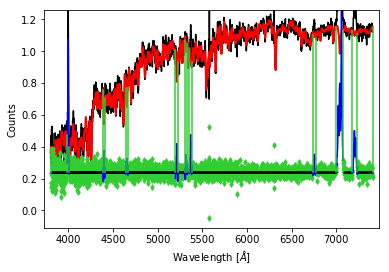

In [121]:
#!/usr/bin/env python
##############################################################################
#
# Usage example for the procedure PPXF, which implements the
# Penalized Pixel-Fitting (pPXF) method originally described in
# Cappellari M., & Emsellem E., 2004, PASP, 116, 138
#     http://adsabs.harvard.edu/abs/2004PASP..116..138C
# and upgraded in Cappellari M., 2017, MNRAS, 466, 798
#     http://adsabs.harvard.edu/abs/2017MNRAS.466..798C
#
# The example also shows how to include a library of templates
# and how to mask gas emission lines if present.
# The example is specialized for a fit to a SDSS spectrum.
#
# MODIFICATION HISTORY:
#   V1.0.0: Written by Michele Cappellari, Leiden 11 November 2003
#   V1.1.0: Log rebin the galaxy spectrum. Show how to correct the velocity
#       for the difference in starting wavelength of galaxy and templates.
#       MC, Vicenza, 28 December 2004
#   V1.1.1: Included explanation of correction for instrumental resolution.
#       After feedback from David Valls-Gabaud. MC, Venezia, 27 June 2005
#   V2.0.0: Included example routine to determine the goodPixels vector
#       by masking known gas emission lines. MC, Oxford, 30 October 2008
#   V2.0.1: Included instructions for high-redshift usage. Thanks to Paul Westoby
#       for useful feedback on this issue. MC, Oxford, 27 November 2008
#   V2.0.2: Included example for obtaining the best-fitting redshift.
#       MC, Oxford, 14 April 2009
#   V2.1.0: Bug fix: Force PSF_GAUSSIAN to produce a Gaussian with an odd
#       number of elements centered on the middle one. Many thanks to
#       Harald Kuntschner, Eric Emsellem, Anne-Marie Weijmans and
#       Richard McDermid for reporting problems with small offsets
#       in systemic velocity. MC, Oxford, 15 February 2010
#   V2.1.1: Added normalization of galaxy spectrum to avoid numerical
#       instabilities. After feedback from Andrea Cardullo.
#       MC, Oxford, 17 March 2010
#   V2.2.0: Perform templates convolution in linear wavelength.
#       This is useful for spectra with large wavelength range.
#       MC, Oxford, 25 March 2010
#   V2.2.1: Updated for Coyote Graphics. MC, Oxford, 11 October 2011
#   V2.3.0: Specialized for SDSS spectrum following requests from users.
#       Renamed PPXF_KINEMATICS_EXAMPLE_SDSS. MC, Oxford, 12 January 2012
#   V3.0.0: Translated from IDL into Python. MC, Oxford, 10 December 2013
#   V3.0.1: Uses MILES models library. MC, Oxford 11 December 2013
#   V3.0.2: Support both Python 2.6/2.7 and Python 3.x. MC, Oxford, 25 May 2014
#   V3.0.3: Explicitly sort template files as glob() output may not be sorted.
#       Thanks to Marina Trevisan for reporting problems under Linux.
#       MC, Sydney, 4 February 2015
#   V3.0.4: Use redshift in determine_goodpixels. MC, Oxford, 5 May 2015
#   V3.1.0: Illustrate how to deal with variable instrumental resolution.
#       Use example galaxy spectrum from SDSS DR12. MC, Oxford, 12 October 2015
#   V3.1.1: Support both Pyfits and Astropy to read FITS files.
#       MC, Oxford, 22 October 2015
#   V3.1.2: Illustrates how to show the wavelength in the plot.
#       MC, Oxford, 18 May 2016
#   V3.1.3: Make files paths relative to this file, to run the example from
#       any directory. MC, Oxford, 18 January 2017
#
##############################################################################

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util

def ppxf_example_kinematics_sdss():

    file_dir = '../ppxf'  # path of this procedure

    # Read SDSS DR12 galaxy spectrum taken from here http://dr12.sdss3.org/
    # The spectrum is *already* log rebinned by the SDSS DR12
    # pipeline and log_rebin should not be used in this case.
    #0.0723216
    file = '../spec-0941-52709-0466.fits'
    hdu = fits.open(file)
    t = hdu['COADD'].data
    z = 0.0723216   # SDSS redshift estimate

    # Only use the wavelength range in common between galaxy and stellar library.
    mask = (t['loglam'] > np.log10(3540)) & (t['loglam'] < np.log10(7409))
    flux = t['flux'][mask]
    galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
    loglam_gal = t['loglam'][mask]
    lam_gal = 10**loglam_gal
    noise = np.full_like(galaxy, 0.166)       # Assume constant noise per pixel here

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel

    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum in any way, given that a red shift
    # corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    # lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    # fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)

    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    t = clock()

    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=2,
              degree=8, mdegree=-1, vsyst=dv, clean=False, lam=lam_gal, reddening=0.08)
    

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))
    plt.show()
    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

if __name__ == '__main__':

    ppxf_example_kinematics_sdss()
    import matplotlib.pyplot as plt
    plt.pause(1)

